In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


In [42]:
#df = pd.read_csv("data_storage/integrated_data/malignant_merged_pathways_reint.csv")
df = pd.read_csv("data_storage/integrated_data/malignant_merged_pathways_reint_newclass.csv")
df.index = df["Unnamed: 0"]
for x in (df.columns):
    print(x)


Unnamed: 0
orig.ident
nCount_RNA
nFeature_RNA
percent.mt
percent.rps
percent.rpl
percent.rp
predicted_doublets
doublet_scores
nCount_SCT
nFeature_SCT
SCT_snn_res.0.3
seurat_clusters
celltype_bped_main
celltype_bped_fine
malignant_nonmalignant
integrated_snn_res.0.5
Curated_celltypes_fine
Curated_celltypes_major
Treatment_Arm
EGFR_Status
Percent_Tumor_PDL1_Expression
Path_Response_Classification
Most_Recent_Disease_Status
Recurrence
Malignant_NonMalignant_v2
MajorGroups_v2
compartment_opt
clone_opt
clone
CellName
Updated_CellType
avAFM
Epithelial.Mesenchymal.Transition1
Mechanosenstive_Signature1
ZWV16_signature1
ZWV08_spatial_signature1
Apical.Junction1
TNF.alpha.Signaling.via.NF.kB1
Myogenesis1
Coagulation1
TGF.beta.Signaling1
Regulation.Of.Cell.Migration..GO.0030334.1
Positive.Regulation.Of.Cellular.Process..GO.0048522.1
Positive.Regulation.Of.Cell.Migration..GO.0030335.1
Positive.Regulation.Of.Blood.Vessel.Endothelial.Cell.Migration..GO.0043536.1
Regulation.Of.Cell.Population.Prolif

In [43]:
Apical_Junction1 = [
    'Apical.Junction1',
    'Integrin.Mediated.Signaling.Pathway..GO.0007229.1',
    "Cell.Matrix.Adhesion..GO.0007160.1",
]

Angiogenesis1 = [
    "Angiogenesis1",
    "Coagulation1",
    "Positive.Regulation.Of.Angiogenesis..GO.0045766.1",
    "Regulation.Of.Blood.Vessel.Endothelial.Cell.Migration..GO.0043535.1",
    "Positive.Regulation.Of.Vasculature.Development..GO.1904018.1",
]

TGF_beta_Signaling1 = [
    'TGF.beta.Signaling1',
    'Positive.Regulation.Of.MAPK.Cascade..GO.0043410.1',
    "Positive.Regulation.Of.Intracellular.Signal.Transduction..GO.1902533.1",
]



Epithelial_Mesenchymal_Transition1 = [
    "Epithelial.Mesenchymal.Transition1",
    "Positive.Regulation.Of.Epithelial.To.Mesenchymal.Transition..GO.0010718.1",
    "Positive.Regulation.Of.Cell.Motility..GO.2000147.1"
]

Main_sigs = [
  'malig_integrated_signature_by_sample1',
  'malig_integrated_signature_by_sample_negUpperQ_poslowerQ1',
  'Mechanosenstive_Signature1',
]
new_pathways = [Main_sigs, Apical_Junction1, 
                Angiogenesis1, 
                Epithelial_Mesenchymal_Transition1,
                TGF_beta_Signaling1,
                
               ]

check_for_neg1 = [ 'avAFM'
                 ]
all_pathways = new_pathways[0]
all_pathways.extend(new_pathways[1])
all_pathways.extend(new_pathways[2])
all_pathways.extend(new_pathways[3])
all_pathways.extend(new_pathways[4])

"\nAngiogenesis_and_Vascular_Development = [\n    'Coagulation1',\n    'Angiogenesis1',\n    'Positive.Regulation.Of.Angiogenesis..GO.0045766.1',\n    'Positive.Regulation.Of.Blood.Vessel.Endothelial.Cell.Migration..GO.0043536.1',\n    'Positive.Regulation.Of.Vasculature.Development..GO.1904018.1',\n    #'Vascular.Endothelial.Growth.Factor.Receptor.Signaling.Pathway..GO.0048010.1',\n#    'Epidermal.Growth.Factor.Receptor.Signaling.Pathway..GO.0007173.1'                                 \n]\n\n\nECM_and_Cell_Adhesion = [\n    'Apical.Junction1',\n    'Integrin.Mediated.Signaling.Pathway..GO.0007229.1',\n    'Cell.Matrix.Adhesion..GO.0007160.1',\n\n    #'Supramolecular.Fiber.Organization..GO.0097435.1',\n    # 'Heterotypic.Cell.Cell.Adhesion..GO.0034113.1',\n    #'Homotypic.Cell.Cell.Adhesion..GO.0034109.1',\n    #'Negative.Regulation.Of.Cell.Cell.Adhesion..GO.0022408.1',\n    #'Regulation.Of.Cell.Cell.Adhesion..GO.0022407.1',\n\n]\n\n\nCell_Migration_and_Proliferation = [\n    #'Positive

In [44]:
new_df = []



#for i,x in df.groupby('RNA_snn_res.15'):
for i,x in df.groupby('integrated_snn_res.10'):

    row = [i]
    for val in check_for_neg1:
        row.append(x[x[val] > 0][val].mean())
    for val in all_pathways:
        row.append(x[val].mean())
    new_df.append(row)
    
col_names = ['cluster']
col_names.extend(check_for_neg1)
col_names.extend(all_pathways)
cluster_df = pd.DataFrame(new_df, columns = col_names)
cluster_df = cluster_df.set_index('cluster')
cluster_df = cluster_df.sort_values(by=['malig_integrated_signature_by_sample1'], na_position='first')
cluster_df

avAFM  malig_integrated_signature_by_sample1  \
cluster                                                       
13       2181.552231                              -0.333430   
15       2107.368180                              -0.332540   
4        2065.178139                              -0.328348   
23       1981.639201                              -0.327477   
18       2069.628377                              -0.316459   
...              ...                                    ...   
5        2050.092459                               0.667494   
10       2072.675467                               0.668930   
56       2276.780138                               0.698386   
14       2138.615875                               0.708782   
53       2244.468267                               0.768952   

         malig_integrated_signature_by_sample_negUpperQ_poslowerQ1  \
cluster                                                              
13                                                0.222581           
15                                                0.357596           
4                                                 0.168778           
23                                                0.399331           
18                                                0.109438           
...                                                    ...           
5                                                -0.156612           
10                                               -0.123158           
56                                               -0.162560           
14                                               -0.126054           
53                                               -0.052060           

         Mechanosenstive_Signature1  Apical.Junction1  \
cluster                                                 
13                         0.065959          0.069442   
15                         0.064802          0.064990   
4                          0.067110          0.070173   
23                         0.083396          0.082506   
18                         0.056653          0.058441   
...                             ...               ...   
5                          0.175000          0.160060   
10                         0.110060          0.116023   
56                         0.122746          0.142705   
14                         0.097880          0.129660   
53                         0.178982          0.136985   

         Integrin.Mediated.Signaling.Pathway..GO.0007229.1  \
cluster                                                      
13                                                0.055201   
15                                                0.065565   
4                                                 0.045760   
23                                                0.088124   
18                                                0.029505   
...                                                    ...   
5                                                 0.233065   
10                                                0.139053   
56                                                0.188303   
14                                                0.100969   
53                                                0.142951   

         Cell.Matrix.Adhesion..GO.0007160.1  Angiogenesis1  Coagulation1  \
cluster                                                                    
13                                 0.028559      -0.003594      0.008150   
15                                 0.026590      -0.015618     -0.004698   
4                                  0.015458       0.003159     -0.012752   
23                                 0.047771       0.031552      0.018913   
18                                 0.013251      -0.010441     -0.012413   
...                                     ...            ...           ...   
5                                  0.224638       0.437525      0.144613   
10                                 0.133336       0

In [45]:
from sklearn.preprocessing import StandardScaler

new_df = []

# Ensure the 'malig_integrated_signature_by_sample1' values are scaled
scaler = StandardScaler()
df['scaled_malig_integrated_signature_by_sample1'] = scaler.fit_transform(df[['malig_integrated_signature_by_sample1']])


n_clusters = 40
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model based on the 'avAFM' column
df['cluster_kmeans'] = kmeans.fit_predict(df[['scaled_malig_integrated_signature_by_sample1']])

for i,x in df.groupby('cluster_kmeans'): #for i,x in df.groupby('integrated_snn_res.10'):


    row = [i]
    for val in check_for_neg1:
        row.append(x[x[val] > 0][val].mean())
    for val in all_pathways:
        row.append(x[val].mean())
    new_df.append(row)
    
col_names = ['cluster']
col_names.extend(check_for_neg1)
col_names.extend(all_pathways)
cluster_df = pd.DataFrame(new_df, columns = col_names)
cluster_df = cluster_df.set_index('cluster')
cluster_df = cluster_df.sort_values(by=['malig_integrated_signature_by_sample1'], na_position='first')

cluster_df

avAFM  malig_integrated_signature_by_sample1  \
cluster                                                       
23       2118.567529                              -0.418326   
32       2108.281184                              -0.393706   
3        2148.176884                              -0.369260   
33       2076.738627                              -0.345912   
19       2182.388680                              -0.319217   
9        2049.858172                              -0.289718   
17       2072.999143                              -0.259528   
1        2027.230544                              -0.230307   
38       2075.523659                              -0.207482   
20       2029.017652                              -0.184630   
7        2006.830062                              -0.161073   
29       2069.547949                              -0.135819   
16       2064.510033                              -0.099706   
6        1969.703597                              -0.048083   
35       2079.697092                               0.004933   
18       2284.877117                               0.062611   
11       2066.987721                               0.124705   
22       2127.769023                               0.189026   
0        2089.074019                               0.245193   
28       2091.786731                               0.297588   
13       2005.043100                               0.346509   
31       2198.491298                               0.393661   
24       2102.750617                               0.451338   
4        2129.989239                               0.502911   
10       2199.128160                               0.553358   
27       2158.851937                               0.605276   
12       2197.002302                               0.654168   
34       2253.582943                               0.695918   
2        2051.542496                               0.738988   
30       1999.689466                               0.783228   
15       2028.683953                               0.827458   
39       2174.590541                               0.865456   
21       2179.083603                               0.912557   
37       2024.668486                               0.959855   
5        2214.108177                               1.006953   
25       2051.995766                               1.071032   
8        2363.898267                               1.198090   
26       2085.601127                               1.316703   
14       2669.553333                               1.519991   
36       2674.347900                               1.723221   

         malig_integrated_signature_by_sample_negUpperQ_poslowerQ1  \
cluster                                                              
23                                                0.209941           
32                                                0.210946           
3                                                 0.196981           
33                                                0.190656           
19                                                0.213289           
9                                                 0.280674           
17                                                0.324046           
1                                                 0.344426           
38                                                0.367325           
20                                                0.354679           
7                                                 0.316824           
29                                                0.323215           
16                                                0.289075           
6                                                 0.236895           
35                                                0.147309           
18                                                0.006603           
11                                               -0.055482           
22                                    

In [46]:
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
df_scaled = pd.DataFrame(scaler.fit_transform(cluster_df), columns=cluster_df.columns)



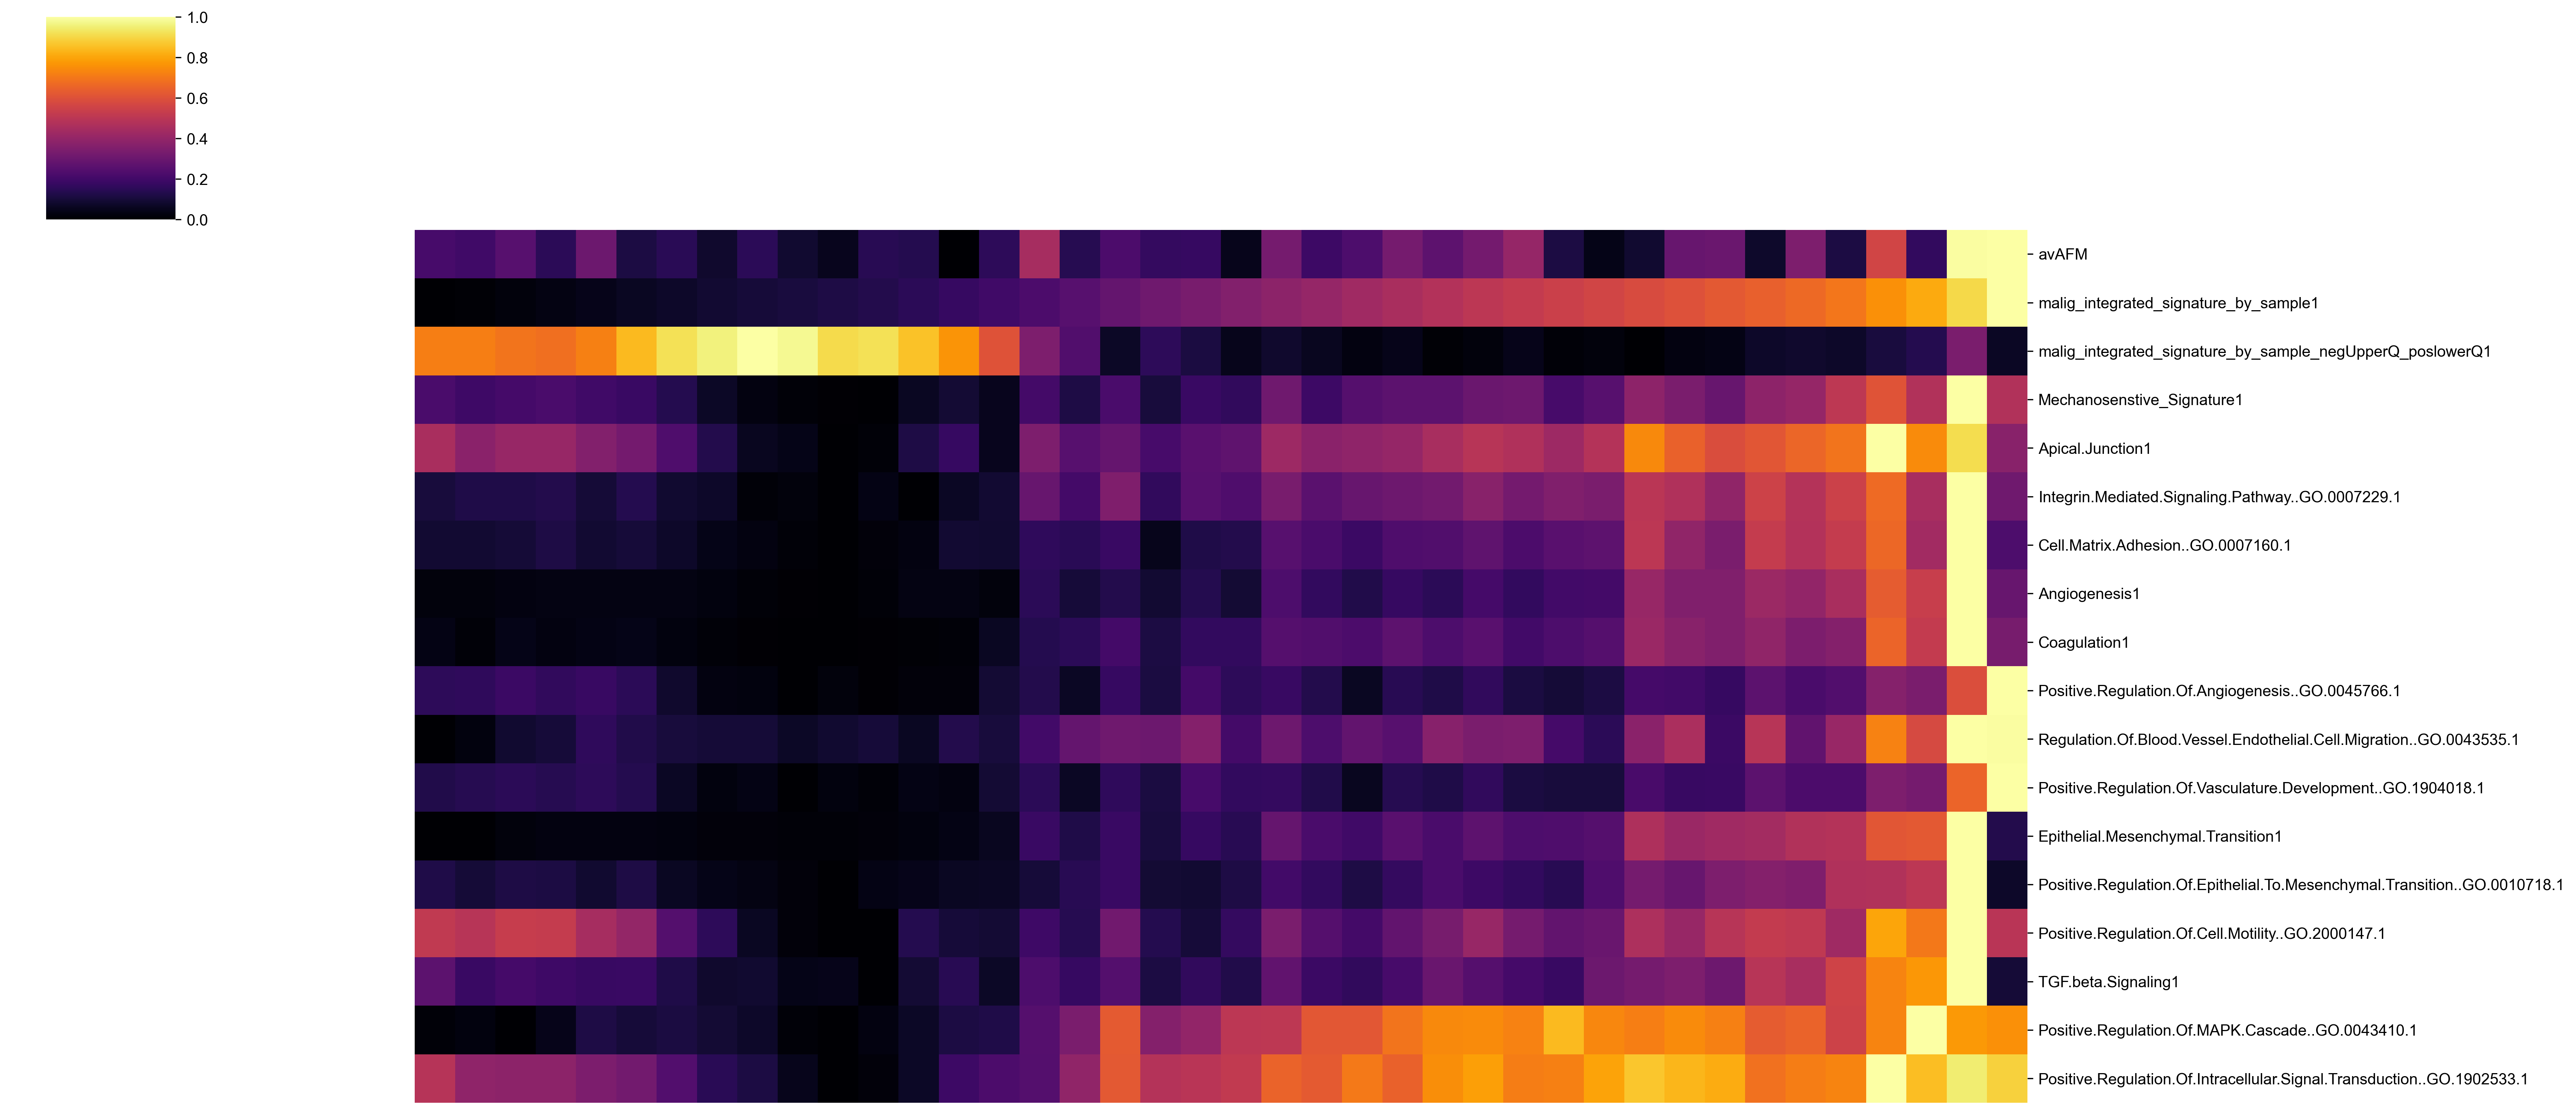

In [47]:
plt.rcParams['figure.dpi'] = 300  # Increase the DPI (e.g., 300 for high resolution)



sns.clustermap(df_scaled.T,col_cluster=False, row_cluster= False, annot=False, fmt=".1f", cmap='inferno', 
              yticklabels=True, xticklabels = False ,figsize=(23, 10))


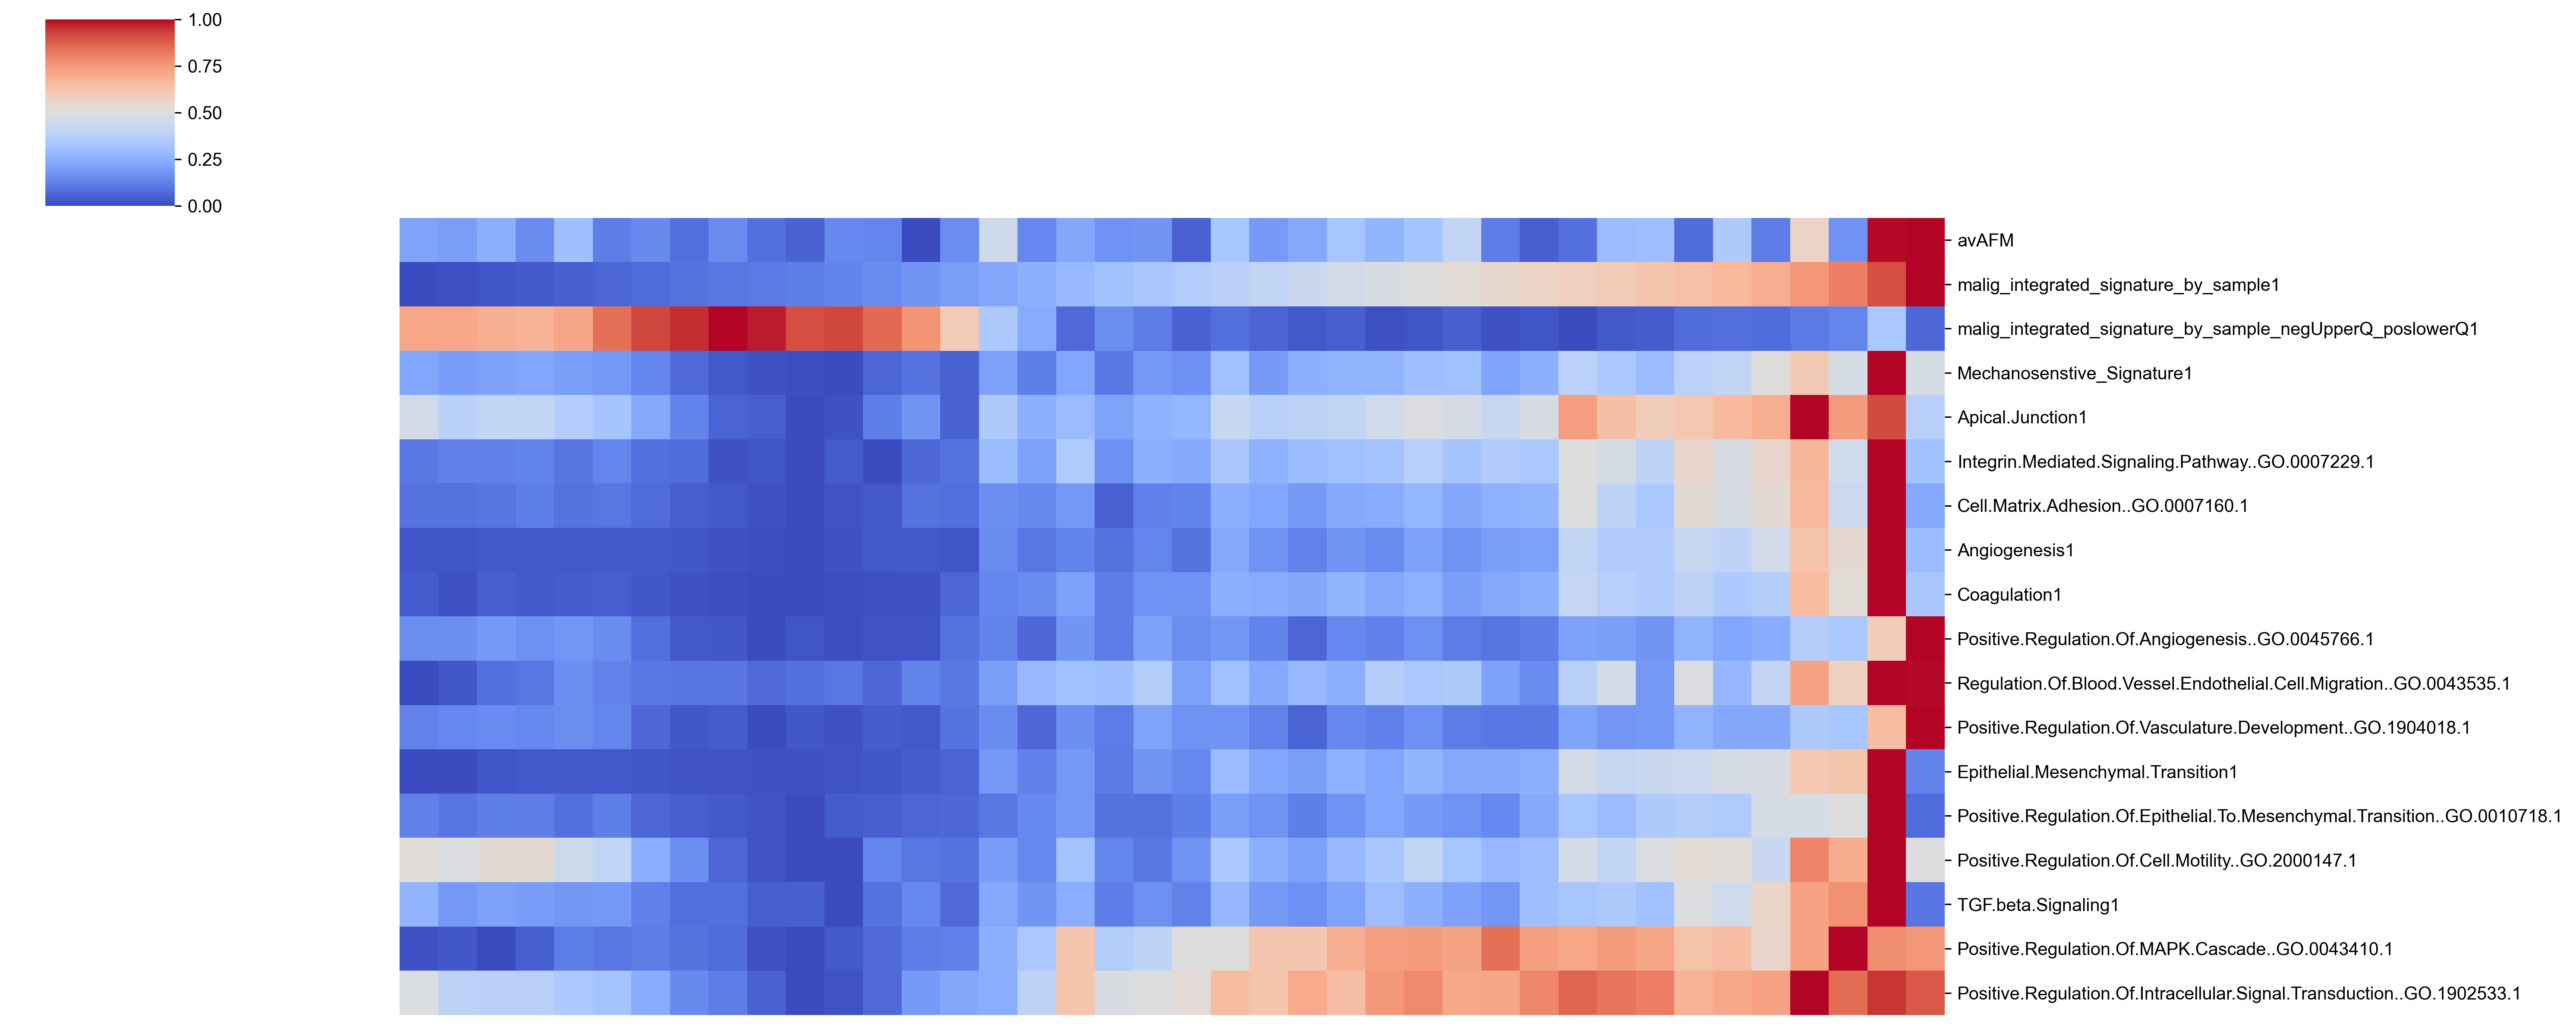

In [48]:
from matplotlib.colors import LinearSegmentedColormap

# Update figure DPI for high resolution
plt.rcParams['figure.dpi'] = 300

# Your heatmap/clustermap with the custom colormap
sns.clustermap(df_scaled.T, col_cluster=False, row_cluster=False, annot=False, fmt=".1f", cmap='coolwarm',
               yticklabels=True, xticklabels=False, figsize=(20, 8))
plt.show()

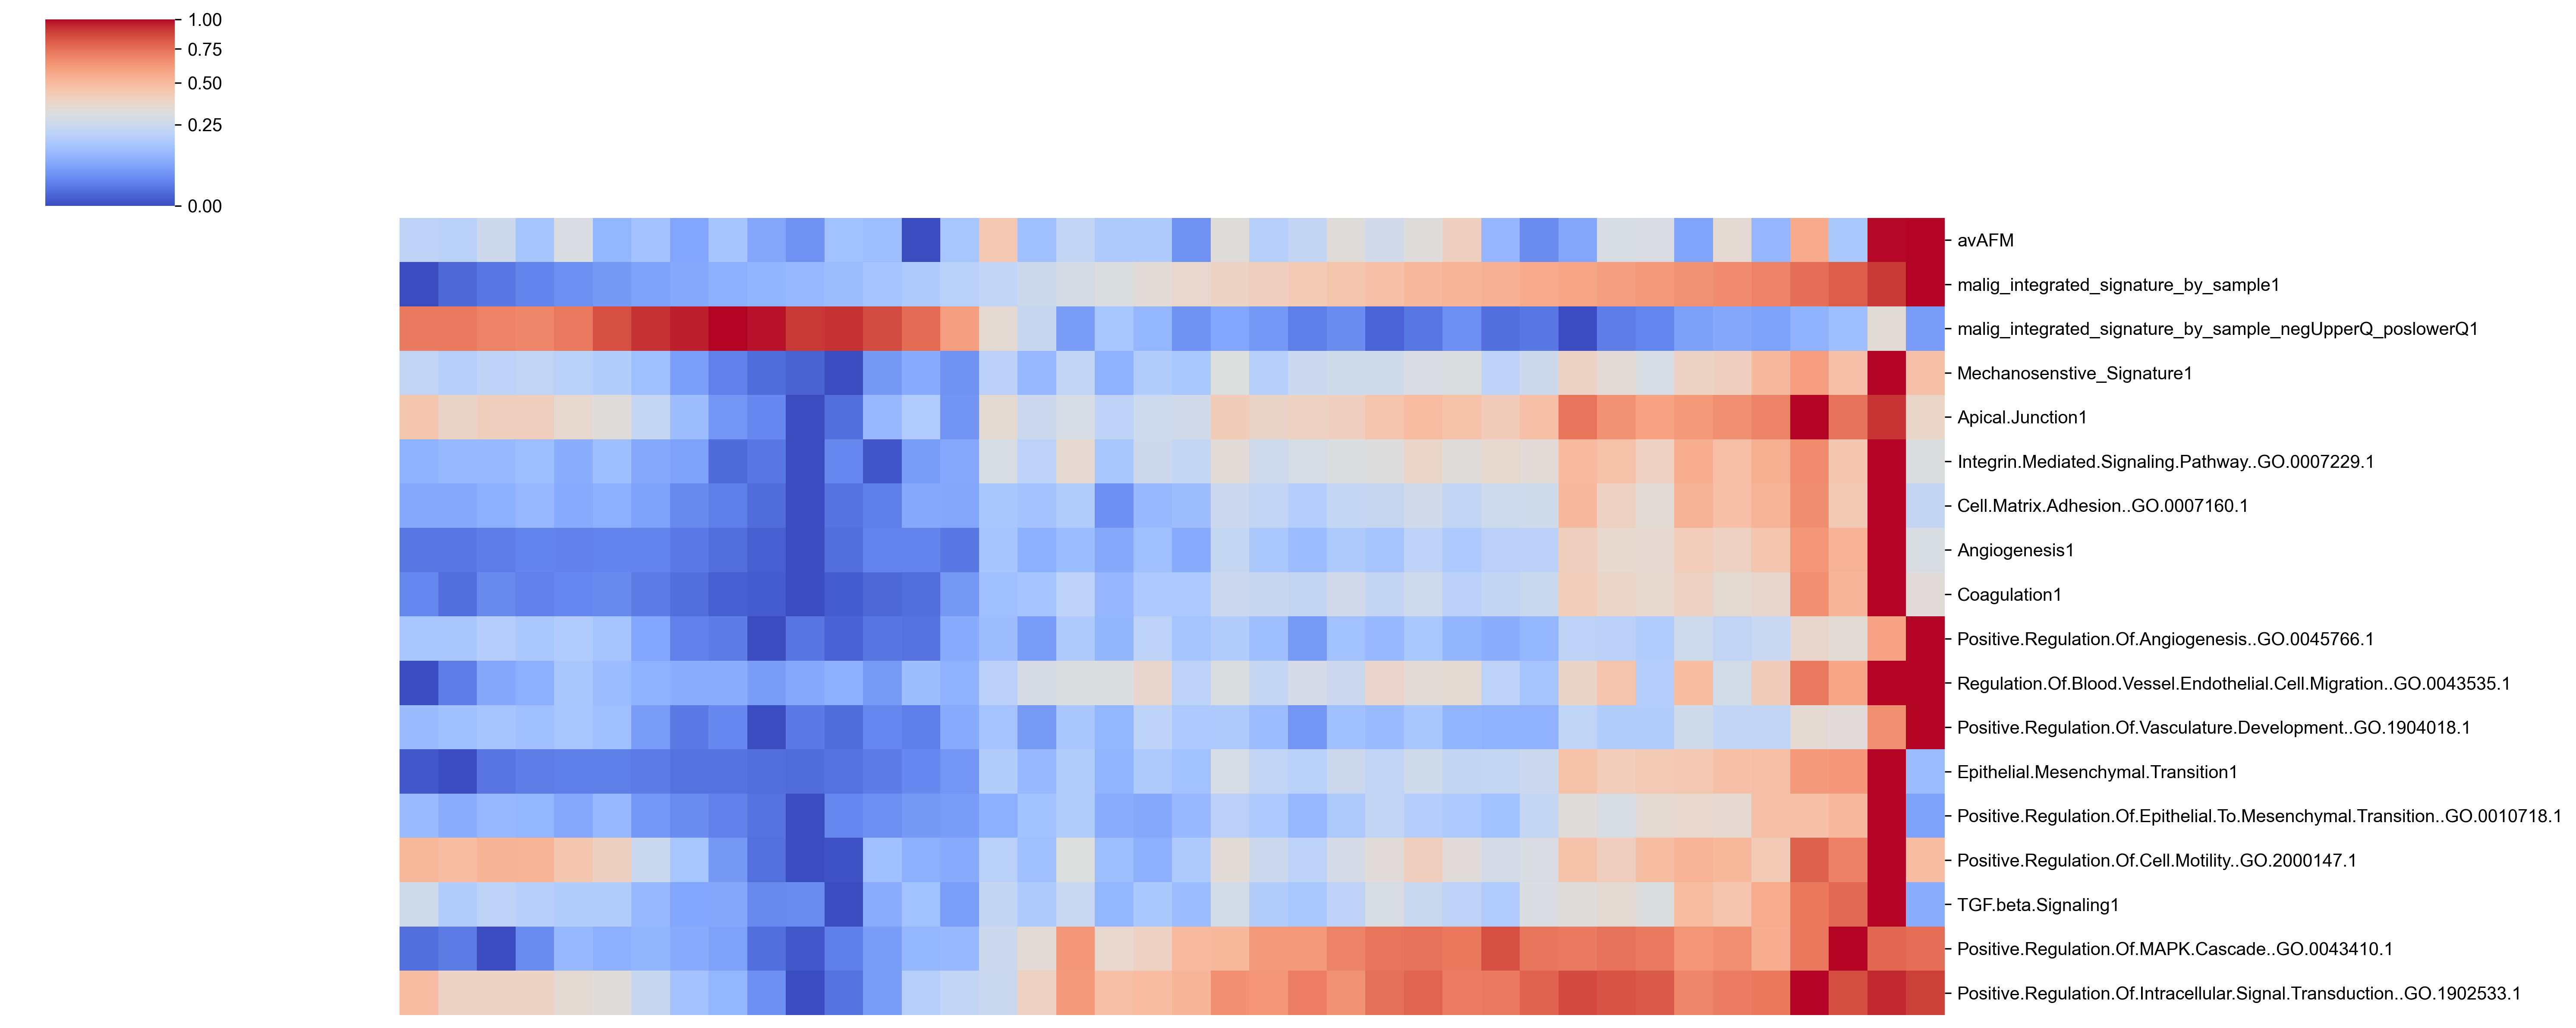

In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm, LinearSegmentedColormap

# Assuming df_scaled is your dataframe with values scaled between 0 and 1

# Define a colormap (optional: to customize colors further) custom_cmap = LinearSegmentedColormap.from_list("custom_coolwarm", ["blue", "white", "red"])

# Apply a power normalization for better distribution
norm = PowerNorm(gamma=0.6)  # Gamma < 1 emphasizes lower values

# Plot the heatmap
plt.rcParams['figure.dpi'] = 300  # High resolution
sns.clustermap(
    df_scaled.T, 
    col_cluster=False, 
    row_cluster=False, 
    annot=False, 
    fmt=".1f", 
    cmap='coolwarm', 
    norm=norm,  # Apply normalization
    yticklabels=True, 
    xticklabels=False, 
    figsize=(20, 8)
)
plt.show()


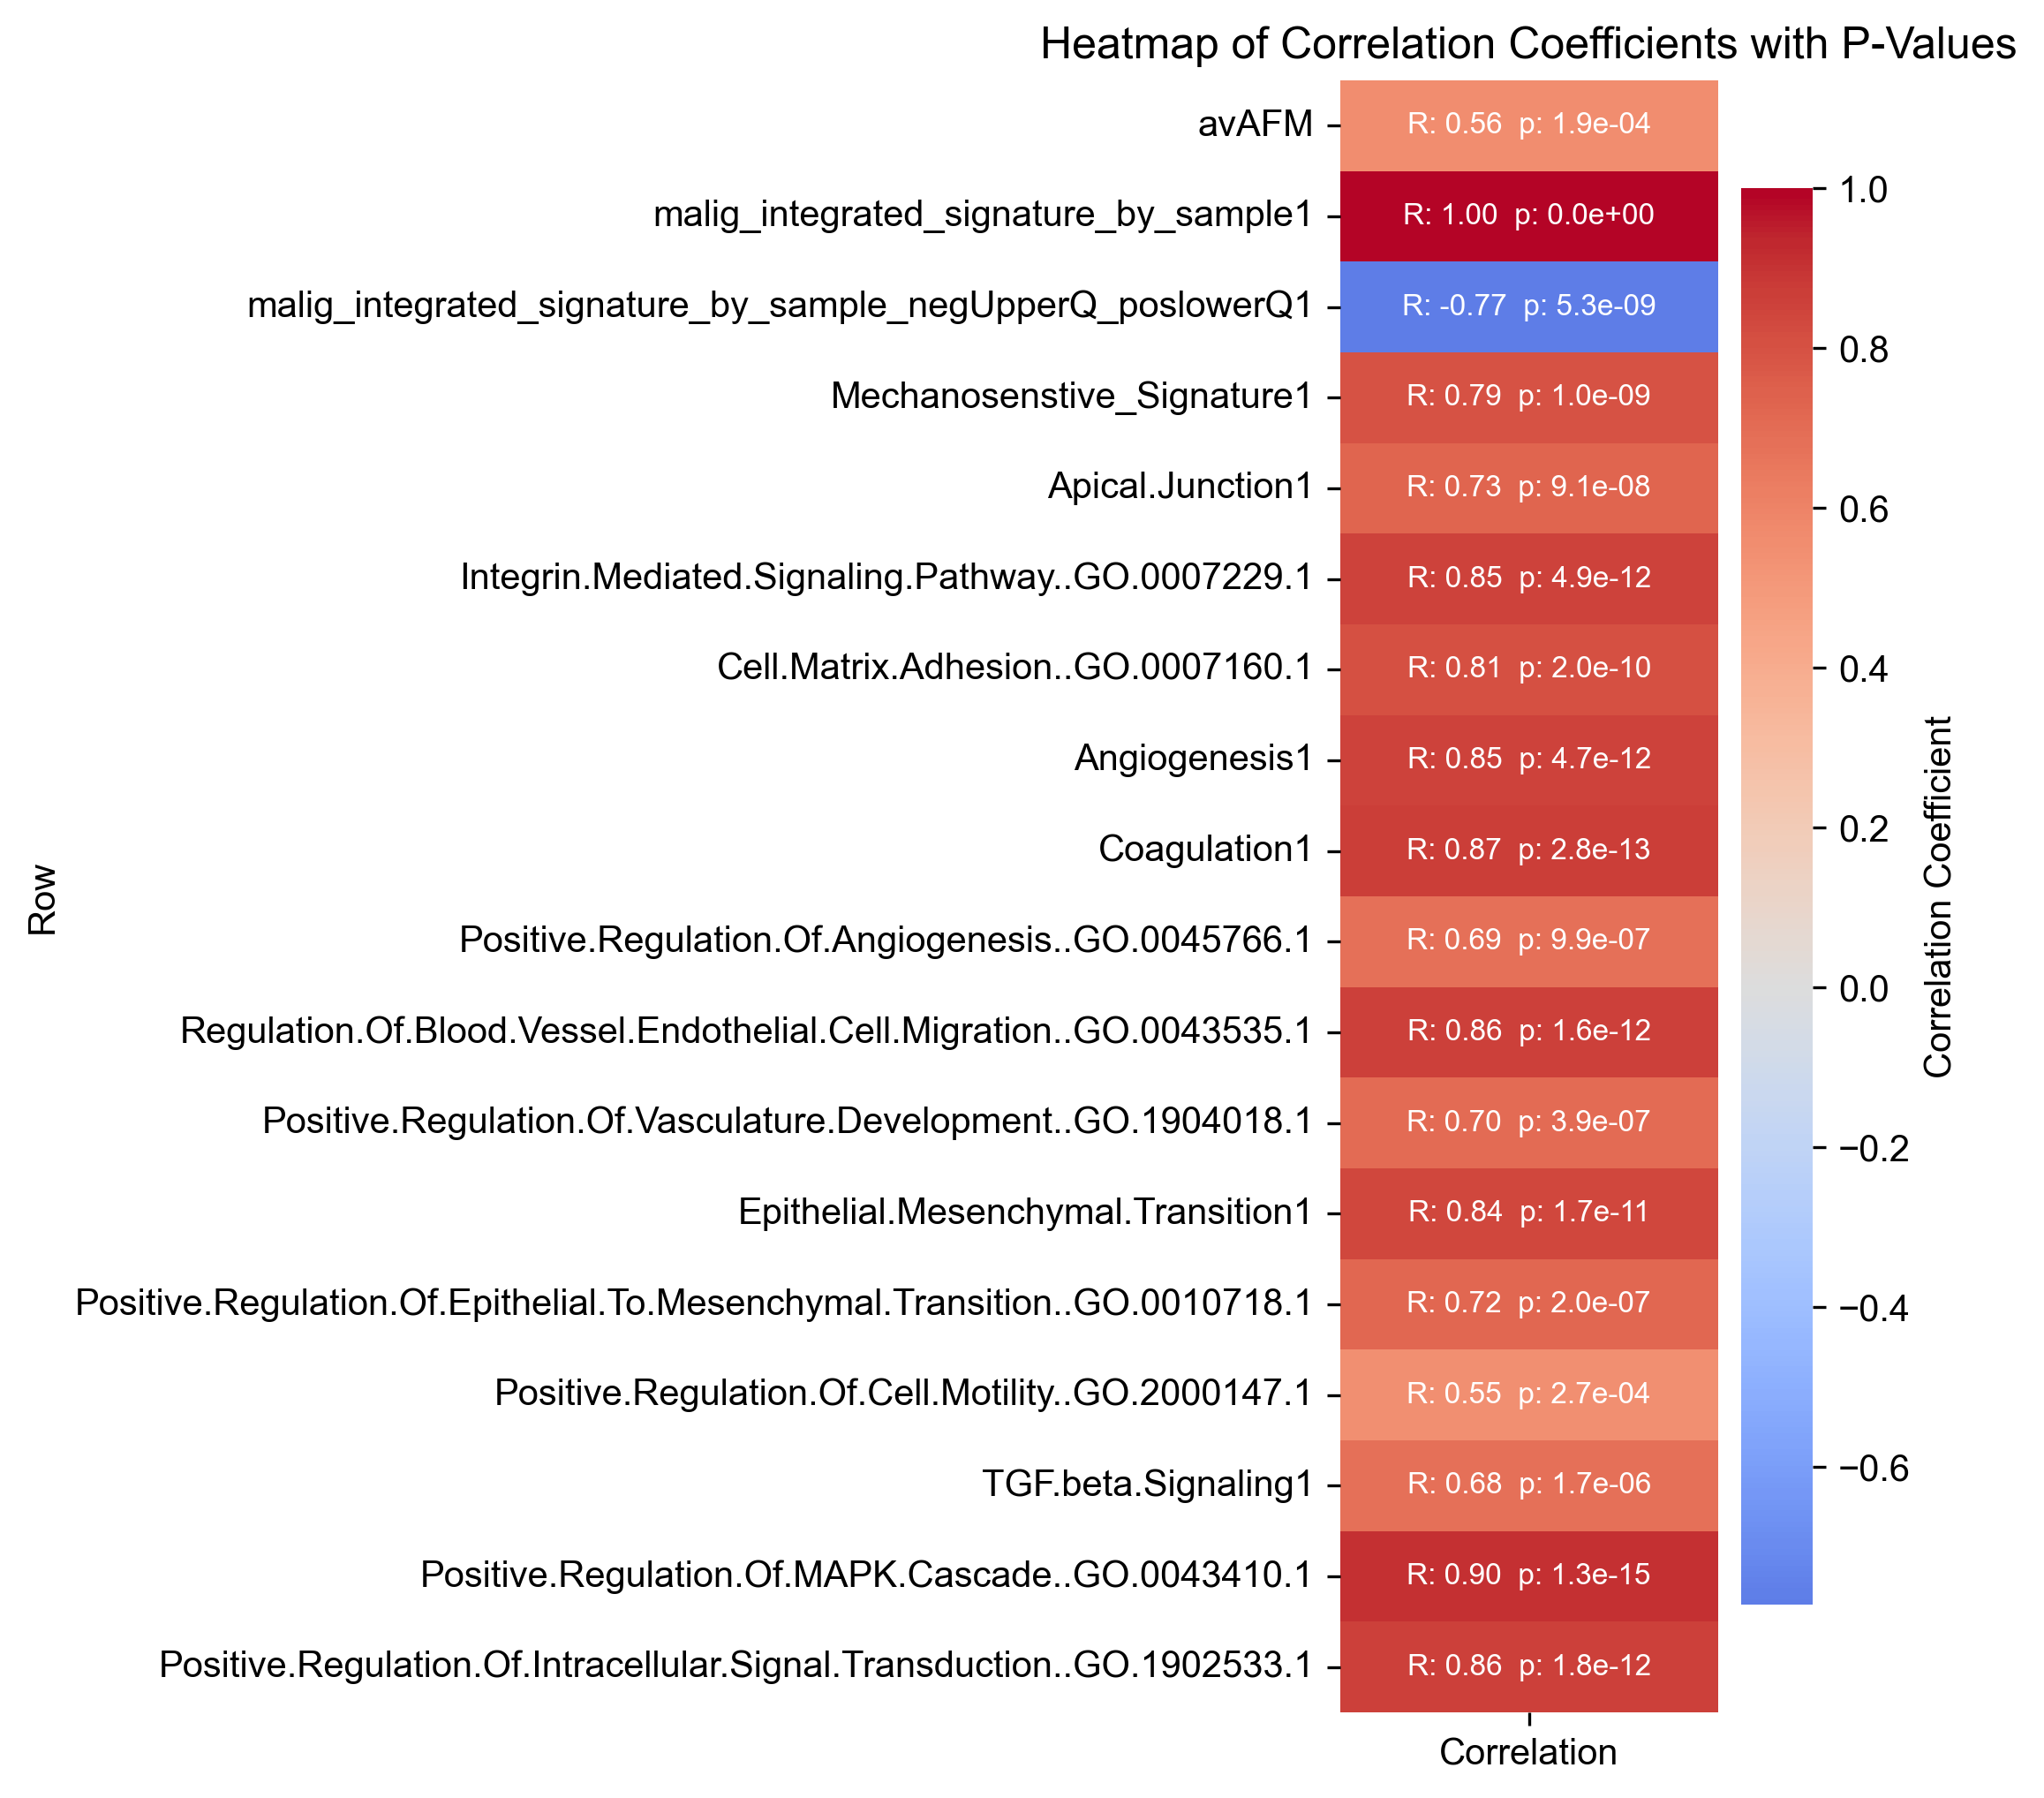

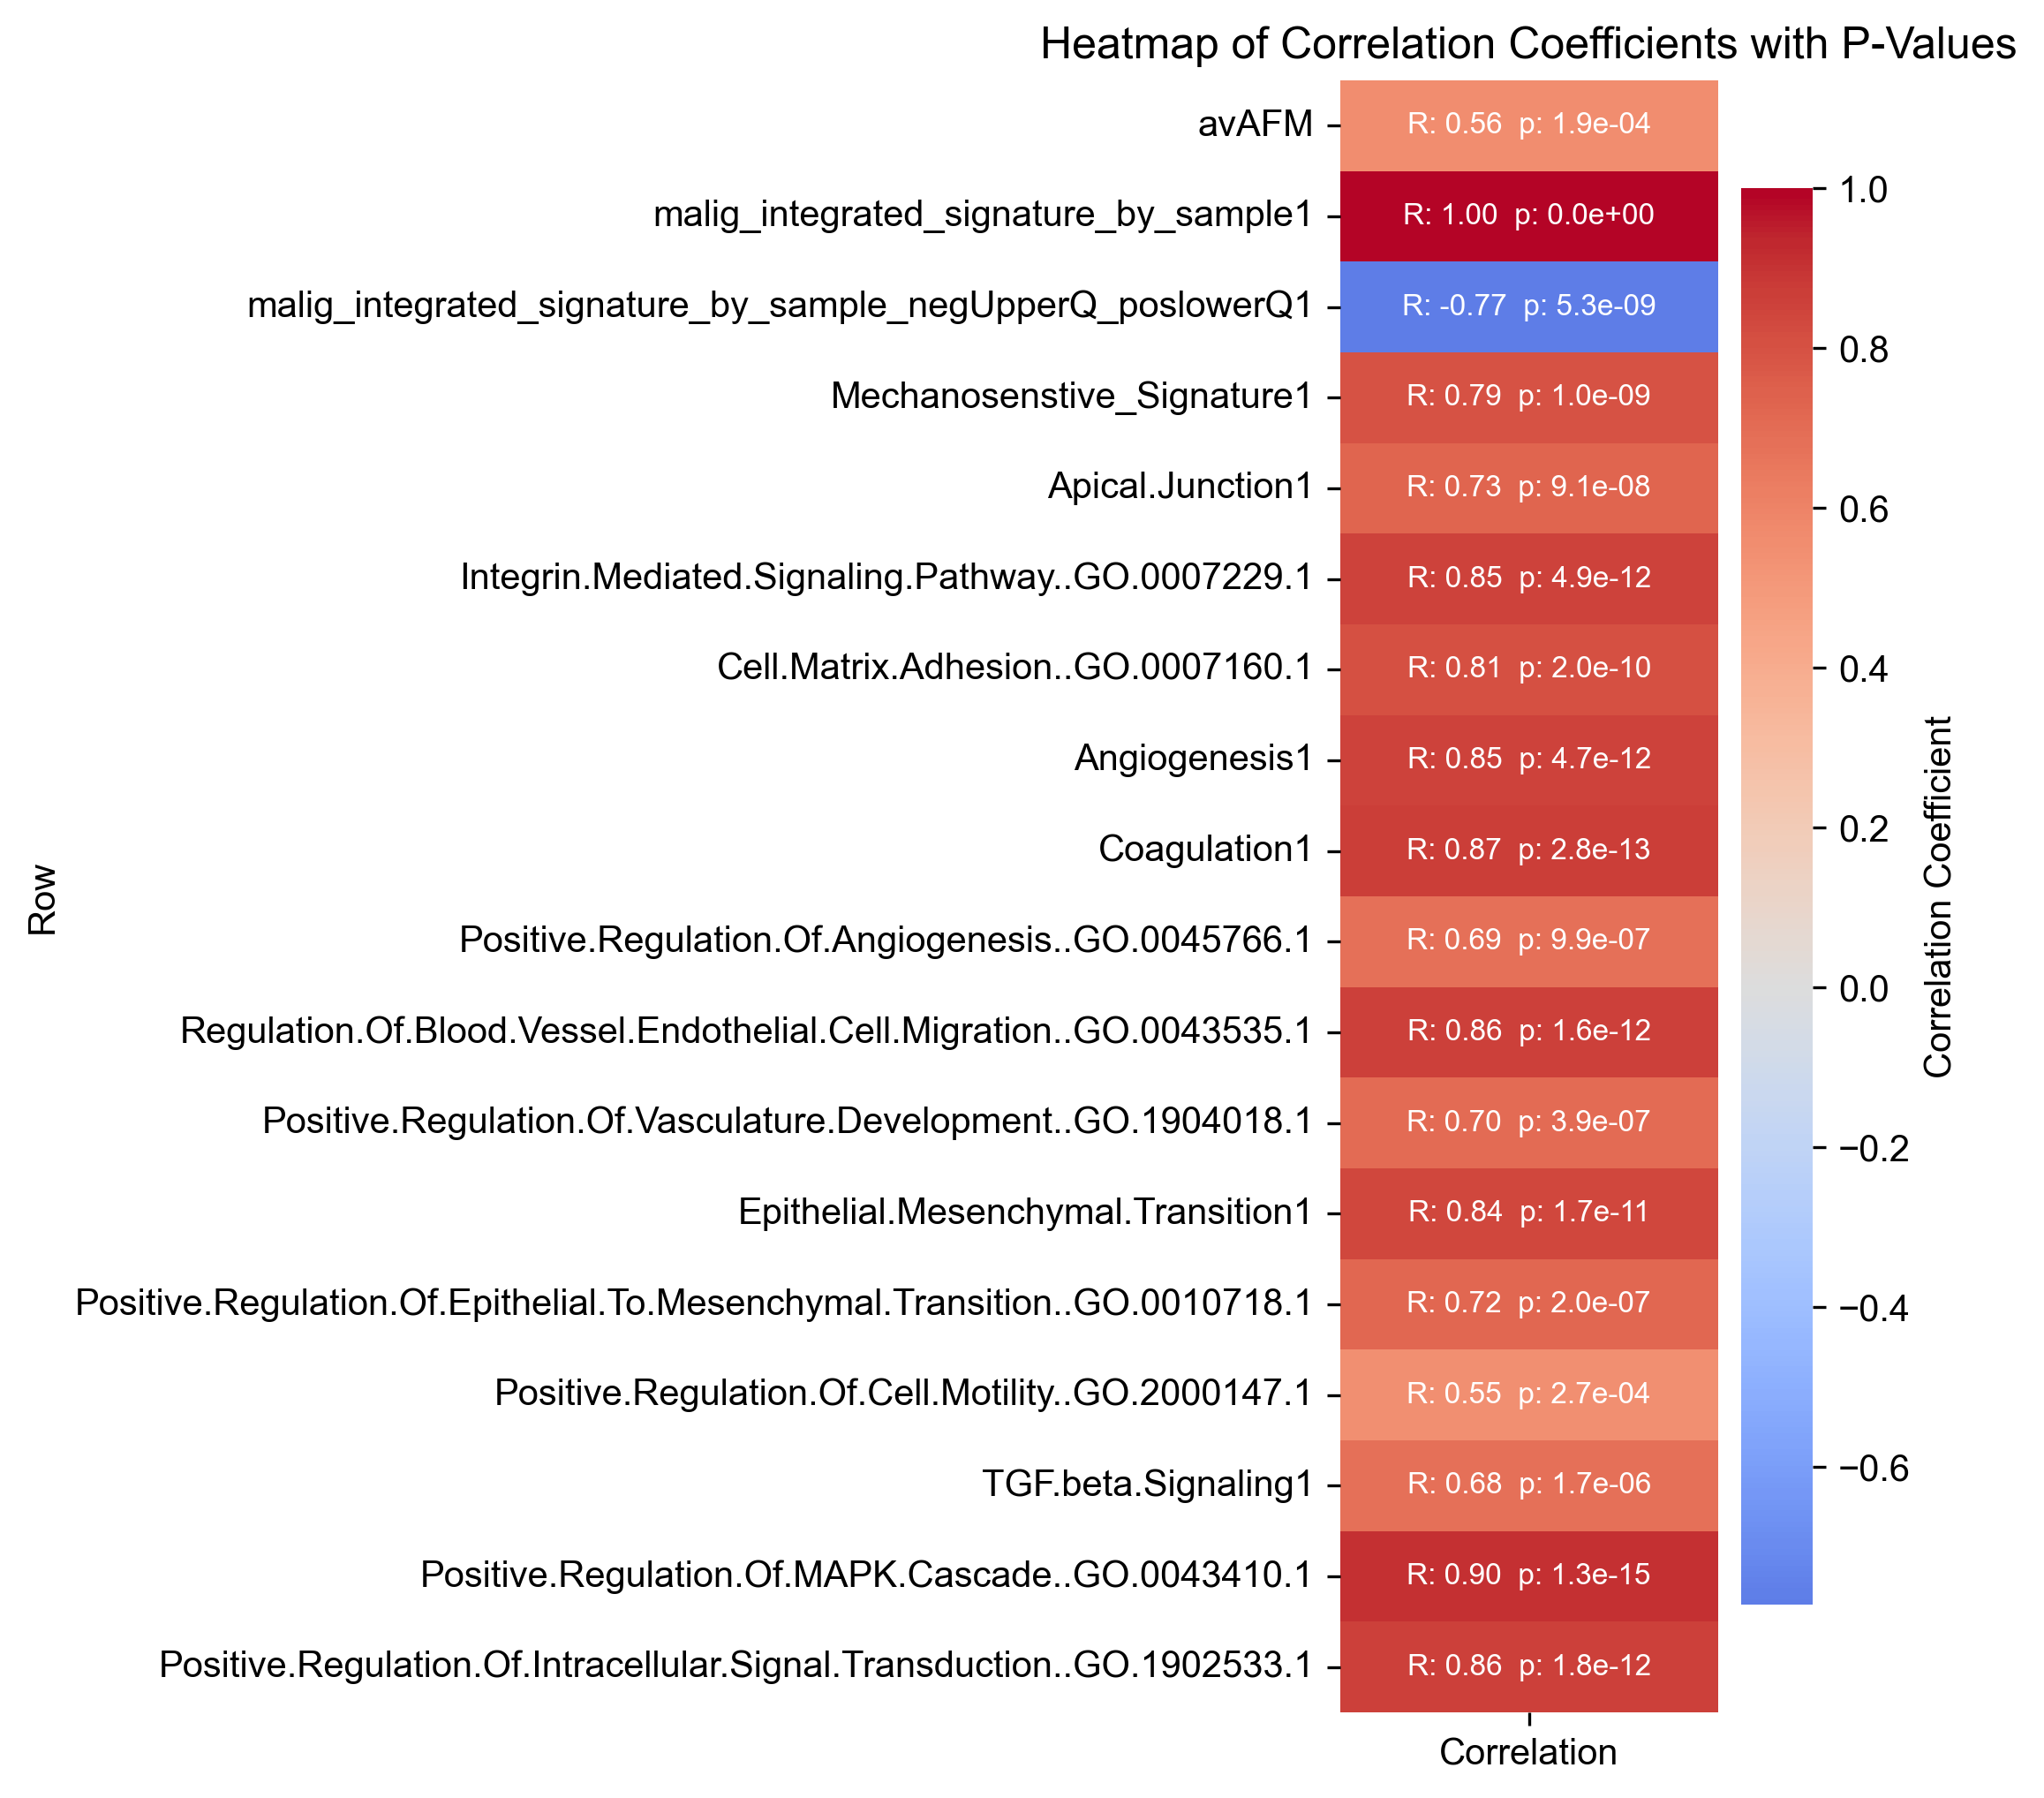

In [40]:
import pandas as pd
import numpy as np


import pandas as pd
from scipy.stats import pearsonr

# Assuming df_scaled is a DataFrame with rows and columns already scaled

# Get the second-to-last row in df_scaled.T
target_row = df_scaled.T.iloc[1]

# Initialize dictionaries to store results
correlations = {}
p_values = {}

# Calculate correlations and p-values
for i, row in df_scaled.T.iterrows():
    corr, p_val = pearsonr(target_row, row)
    correlations[i] = corr
    p_values[i] = p_val

# Create a DataFrame for better visualization of results
results_df = pd.DataFrame({
    "Row": df_scaled.T.index,
    "Correlation": correlations.values(),
    "P-Value": p_values.values()
})

# Sort by correlation for better interpretation

# Display the results
results_df
# Assuming `results_df` contains correlations and p-values for all rows
r_values_matrix = results_df[["Row","Correlation"]].set_index("Row")
p_values_matrix = results_df[["Row","P-Value"]].set_index("Row")

# Create a DataFrame for combined annotations
annotations = r_values_matrix.copy()
annotations["P-Value"] = p_values_matrix["P-Value"]
annotations = annotations.apply(
    lambda row: f"R: {row['Correlation']:.2f}  p: {row['P-Value']:.1e}",
    axis=1
)

# Convert annotations to a DataFrame with the same shape as the matrix
annotation_matrix = annotations.values.reshape(-1, 1)
plt.rcParams["font.family"] = "Arial"

# Plot a combined heatmap with the annotations
plt.figure(figsize=(2.3, 8))
sns.heatmap(
    r_values_matrix, 
    cmap="coolwarm", 
    annot=annotation_matrix, 
    annot_kws={"size": 8},  # Set font size of annotations

    center=0.0,
    fmt="",  # No formatting, as annotations are preformatted strings
    cbar_kws={"label": "Correlation Coefficient"}
)
plt.title("Heatmap of Correlation Coefficients with P-Values")

plt.savefig("heatmap_correlation.pdf", format="pdf", bbox_inches="tight")
plt.show()



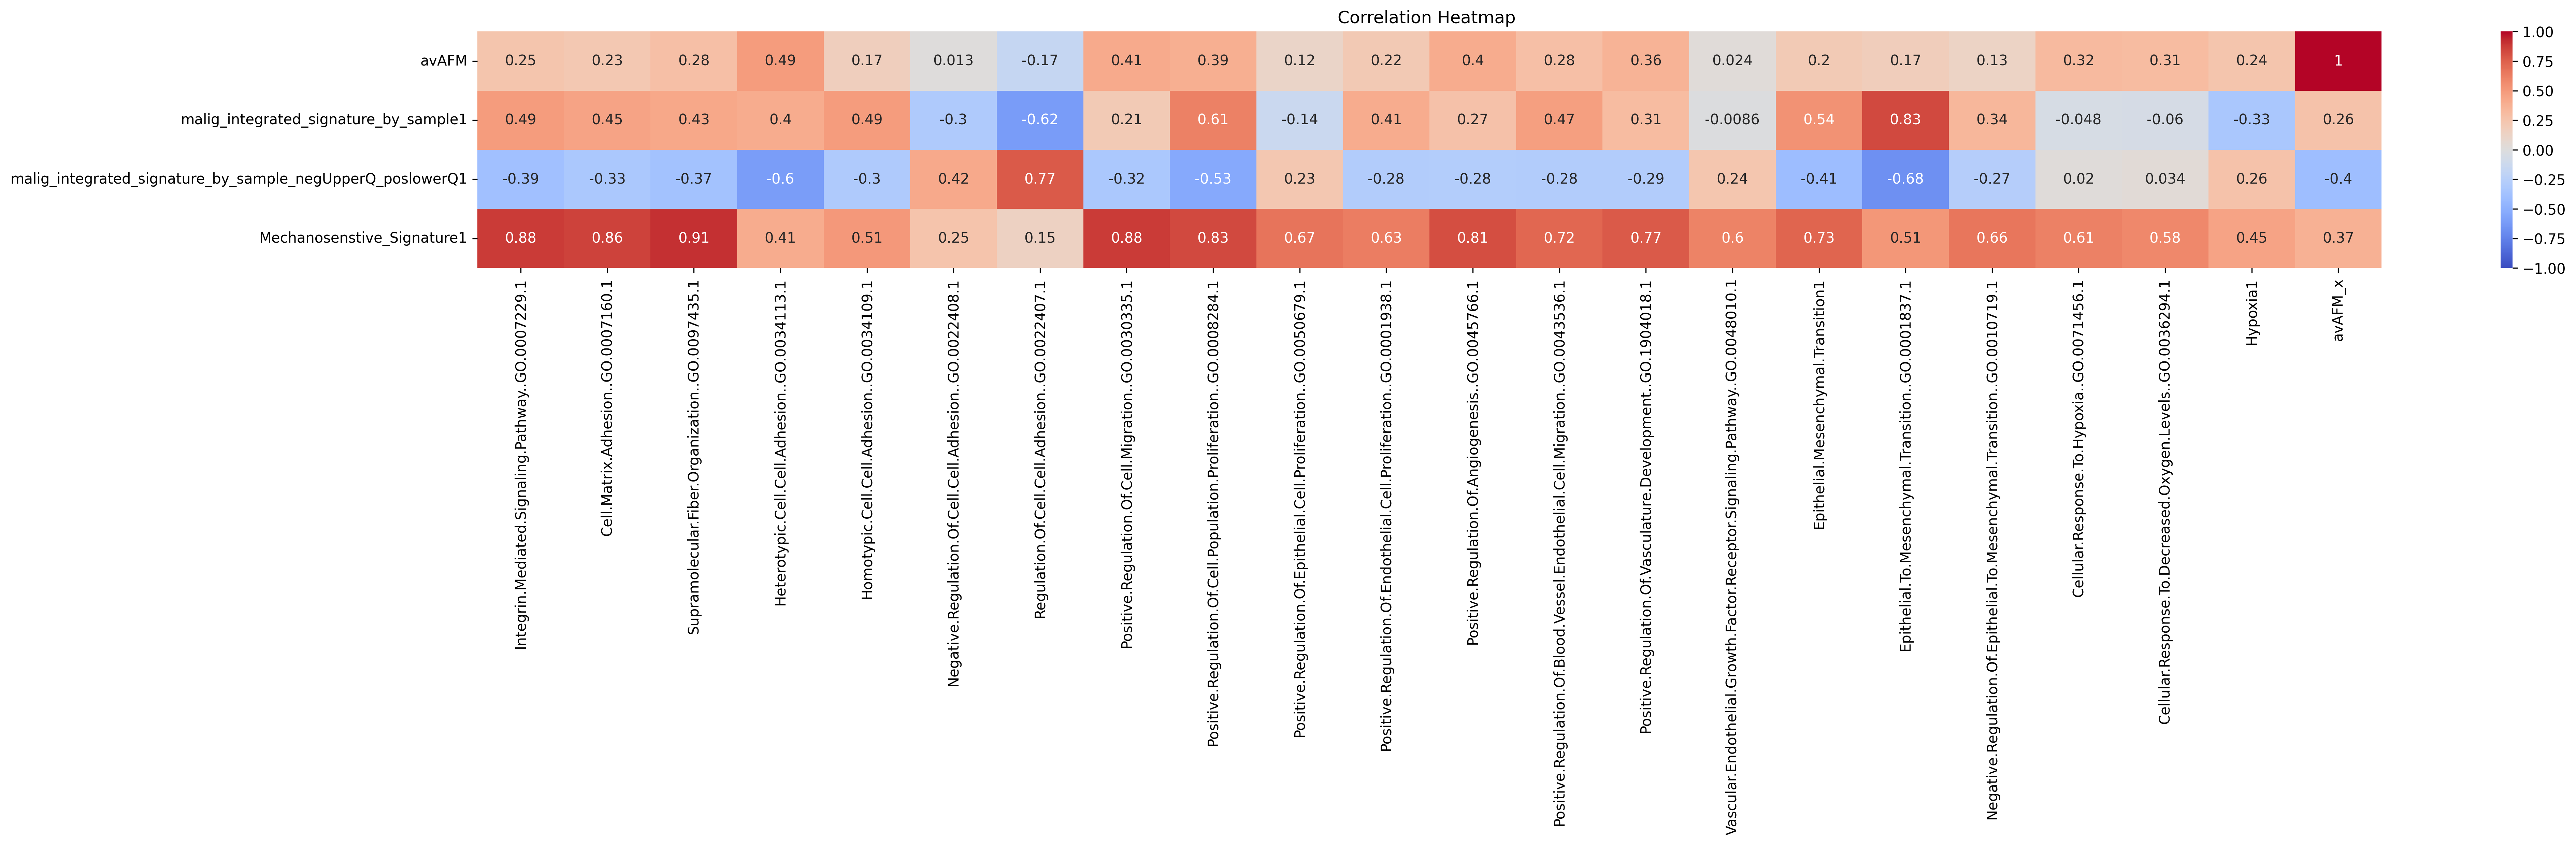

In [185]:
df_scaled['avAFM_x'] = df_scaled['avAFM']
correlations = df_scaled.iloc[:, :5].corrwith(df_scaled.iloc[:, 4:], axis=0)

# Reshape into a 3x(n-3) DataFrame
correlation_matrix = pd.DataFrame([df_scaled.iloc[:, :4].corrwith(df_scaled.iloc[:, i]) for i in range(4, df_scaled.shape[1])], 
                                  columns=df_scaled.columns[:4],
                                  index=df_scaled.columns[4:])
# Plot heatmap
plt.figure(figsize=(30, 3))
sns.heatmap(correlation_matrix.T, annot=True, cmap="coolwarm", cbar=True, vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap ')
plt.show()





In [186]:
df_scaled

avAFM  malig_integrated_signature_by_sample1  \
0   0.159157                               0.000000   
1   0.275762                               0.016652   
2   0.259082                               0.019000   
3   0.472505                               0.038915   
4   0.372758                               0.050713   
..       ...                                    ...   
62  0.438234                               0.690823   
63  0.158199                               0.706138   
64  0.695948                               0.729916   
65  0.611170                               0.822564   
66  0.756050                               1.000000   

    malig_integrated_signature_by_sample_negUpperQ_poslowerQ1  \
0                                            1.000000           
1                                            0.895250           
2                                            0.878128           
3                                            0.701941           
4                                            0.494622           
..                                                ...           
62                                           0.076721           
63                                           0.040827           
64                                           0.151343           
65                                           0.126096           
66                                           0.229074           

    Mechanosenstive_Signature1  \
0                     0.393377   
1                     0.493335   
2                     0.409271   
3                     0.307999   
4                     0.301552   
..                         ...   
62                    0.387027   
63                    0.186009   
64                    0.694769   
65                    0.563533   
66                    0.999720   

    Integrin.Mediated.Signaling.Pathway..GO.0007229.1  \
0                                            0.410428   
1                                            0.383877   
2                                            0.260879   
3                                            0.192642   
4                                            0.109335   
..                                                ...   
62                                           0.342160   
63                                           0.221462   
64                                           0.587867   
65                                           0.417537   
66                                           0.578135   

    Cell.Matrix.Adhesion..GO.0007160.1  \
0                             0.295434   
1                             0.304140   
2                             0.276141   
3                             0.173228   
4                             0.152217   
..                                 ...   
62                            0.170199   
63                            0.041728   
64                            0.698223   
65                            0.580310   
66                            0.514755   

    Supramolecular.Fiber.Organization..GO.0097435.1  \
0                                          0.298976   
1                                          0.371608   
2                                          0.226599   
3                                          0.216541   
4                                          0.211282   
..                                              ...   
62                                         0.165706   
63                                         0.173799   
64                                         0.614142   
65                                         0.559008   
66                                         0.584731   

    Heterotypic.Cell.Cell.Adhesion..GO.0034113.1  \
0                                       0.000000   
1                                       0.203570   
2                                       0.089508   
3                                       0.243640   
4                                       0.401

/tmp/ipykernel_27476/3321680212.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.00*' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  correlation_matrix.loc['avAFM_x', col] = f"{value:.2f}*"
/tmp/ipykernel_27476/3321680212.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.26*' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  correlation_matrix.loc['avAFM_x', col] = f"{value:.2f}*"
/tmp/ipykernel_27476/3321680212.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.37*' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  correlation_matrix.loc['avAFM_x', col] = f"{value:.2f}*"
/tmp/ipykernel_27476/3321680212

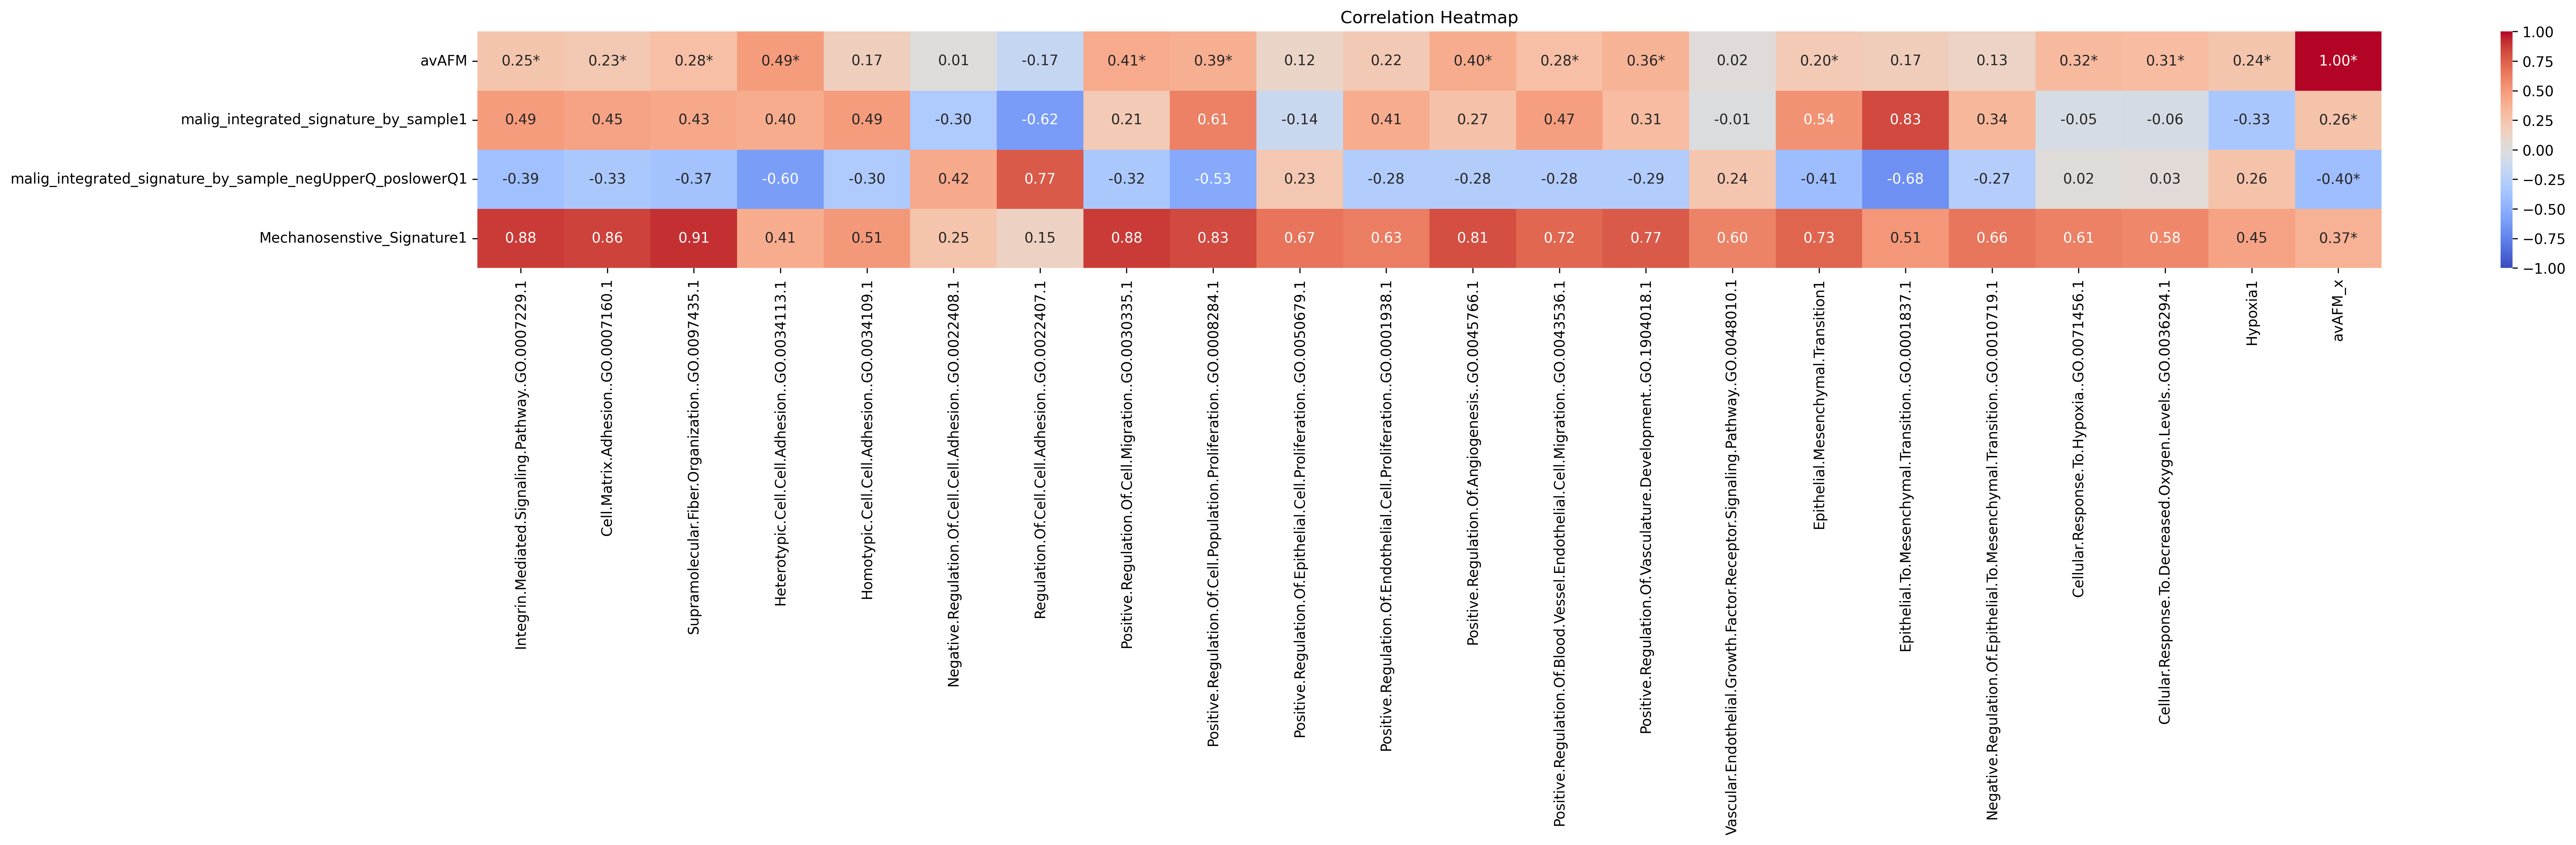

In [187]:
confidence = pd.read_csv("avAFM_permuation_confidence_generation.csv")
correlation_matrix = pd.DataFrame([df_scaled.iloc[:, :4].corrwith(df_scaled.iloc[:, i]) for i in range(4, df_scaled.shape[1])], 
                                  columns=df_scaled.columns[:4],
                                  index=df_scaled.columns[4:])


neg_correlation_filter = (confidence["observed_correlation"] < 0) & (confidence["p_value_neg"] < 0.05)

# If correlation is positive, p_value_pos > 0.05
pos_correlation_filter = (confidence["observed_correlation"] > 0) & (confidence["p_value_pos"] < 0.05)

# Combine the conditions and filter the dataframe
filtered_confidence = confidence[neg_correlation_filter | pos_correlation_filter]
confident_columns
correlation_values = correlation_matrix.copy().astype(float)
# Iterate through confident columns for modifying 'avAFM_x' values
for col in confident_columns:
    if col in correlation_matrix.columns and 'avAFM_x' in correlation_matrix.index:
        try:
            # Retrieve the value from the copied correlation_values for accurate float representation
            value = float(correlation_values.loc['avAFM_x', col])
            # Assign the formatted value with stars
            correlation_matrix.loc['avAFM_x', col] = f"{value:.2f}*"
        except (ValueError, KeyError):
            # If conversion fails, assign a default formatted value
            correlation_matrix.loc['avAFM_x', col] = f"{correlation_matrix.loc['avAFM_x', col]:.2f}"

# Safely modify 'avAFM' column values based on 'confident_columns'
for row in confident_columns:
    if 'avAFM' in correlation_matrix.columns and row in correlation_matrix.index:
        try:
            # Retrieve the value from the copied correlation_values for accurate float representation
            value = float(correlation_values.loc[row, 'avAFM'])
            # Assign the formatted value with stars
            correlation_matrix.loc[row, 'avAFM'] = f"{value:.2f}*"
        except (ValueError, KeyError):
            # If conversion fails, assign a default formatted value
            correlation_matrix.loc[row, 'avAFM'] = f"{correlation_matrix.loc[row, 'avAFM']:.2f}"



def safe_format(x):
    # Check if it's a string that already has a decimal point (like "-0.20**")
    if isinstance(x, str) and any(char.isdigit() for char in x):
        return x  # Leave it as is if it appears to be formatted
    # If it's not a string, format it to two decimal places
    try:
        return f"{float(x):.2f}"
    except (ValueError, TypeError):
        return x  # In case conversion fails, return the original value

# Apply the safe formatting function to all elements in the DataFrame
correlation_matrix = correlation_matrix.applymap(safe_format)


# Plot the heatmap
plt.figure(figsize=(30, 3))
sns.heatmap(
    correlation_values.T,
    annot=correlation_matrix.T,  # Use the transposed correlation matrix for annotations
    fmt="",  # Avoid formatting issues with strings
    cmap="coolwarm",
    cbar=True,
    vmin=-1,
    vmax=1,
    center=0
)
plt.title('Correlation Heatmap')
plt.show()